<h1 style="text-align:center">Lab 1: Mid-Term 1</h1>
<h3 style="text-align:center">MCHE474: Control Systems</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In this notebook, we'll be looking at the solutions to the first Mid-term. We'll use the [transfer functions from the solutions posted on the class website](http://crawlab.org/classes/MCHE474_Fa17/Exams/MCHE474_Midterm1_Solutions_Fall2017.pdf). For each problem, we'll solve the questions covering the question of steady-state error, in addition to investigating the response itself, and the effects of changing damping. In other words, we will be working on:

* Problem 1e
* Problem 1f
* Problem 2c
* Problem 2d
* Problem 3f
* Problem 3g

We'll first  place a "watermark"  that will display our system information, which you should have installed for the zeroth lab assignment. We'll use the options in the package to tell us about versions of specific python packages. In this case, we'll check the versions of the NumPy, SciPy, matplotlib, Jupyter Notebook, and Control packages.

In [1]:
# We first need to tell the Jupyter Notebook to load the extension
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,scipy,control,notebook,matplotlib

CPython 3.6.2
IPython 6.1.0

numpy 1.12.1
scipy 0.19.0
control 0.7.0
notebook 5.0.0
matplotlib 2.0.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)
system     : Darwin
release    : 17.0.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


Now, we'll first import NumPy, then set up the notebook for plotting using the matplotlib library, and finally, import the control systems library.

In [3]:
# Grab all of the NumPy functions with namespace np
import numpy as np              

In [4]:
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

In [5]:
import control # This will import the control library. We'll need to preface any commands from it with control.

Finally, we'll use the numeric portion of our CLID's as a "seed" for the random number generator to uniquely identify yoru notebook. This will make the resulting string of numbers  *i.)* repeatable and *ii.)* unique to the seed value, meaning your plots will be unique to your  CLID numerals. 

In the first code block below, change 1234 to be the numeric portion of your CLID. This creates a random number generator with that as the seed.

In [6]:
# Change 1234 to match the numeric portion of your CLID
my_random_generator = np.random.RandomState(seed=9637) 

Now, we'll use this generator to generate an array of 500 elements and plot them.

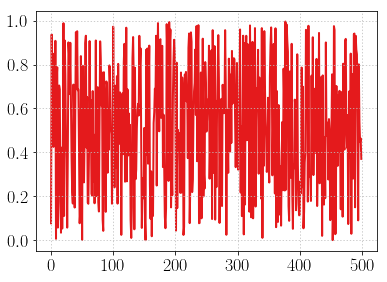

In [7]:
my_random_numbers = my_random_generator.rand(500) # Generate 500 random numbers


# Now, we'll plot them. Here, we'll just use the matplotlib defaults. 
# By default, no axis labels, etc are included.
# Later, we'll generate nicer plots by modifying some of those defaults.
plt.plot(my_random_numbers)

## Problem 1
The system in Figure consists of mass, $m$, connected to ground through
a spring of spring constant $k$ and a damper of damping coefficient $c$.
Until time $t = 0$, the mass is held so that gravitational forces have
no net effect on the system. At time $t = 0$ the mass is released, so
that gravitational forces *do* affect the system.

a.  Write the equations of motion for this system.

b.  What is the natural frequency?

c.  What is the damping ratio?

If you were unable to solve parts a. to c. of this problem, assume the
equations of motion have the form
$\ddot{x} + 2 \zeta\omega_n \dot x + \omega_n^2 x = u$ in the
next two parts of this question. If you were able to solve parts a. to
c. of this problem, use your answer from there.

d.  What is the transfer function relating the position of the mass to
    the gravitational force?

e.  What is the time response, $x(t)$, of this system? (*Hint:*
    Consider the release of the mass at $t = 0$ to be a step change in
    gravitational force.)

f.  What is the steady-state position of the mass?


See the [solutions posted the class site](http://crawlab.org/classes/MCHE474_Fa17/Exams/MCHE474_Midterm1_Solutions_Fall2017.pdf) for how to solve parts a. to e. of this problem. 

#### Part e.
To take a closer look at part e. of the problem, we'll use the transfer function from those solutions to plot the time response using the `.step_response()` function from the control systems library. We'll compare that result from a plot generated the analytical solution from the exam. We'll also use the `.step_response()` to get a numeric estimate of the steady-steate solution asked for in part f. of th problem

We'll first define some parameters to use in the simulations for the comparison. Here, I pick a combination that gives a natural frquency of 1Hz and a damping ration of 0.1.

In [8]:
m = 1.0                # mass (kg)
k = (2 * np.pi)**2     # spring constant (N/m)
wn = np.sqrt(k / m)    # natural frequncy (rad/s)

zeta = 0.1             # damping ratio
c = 2 * m * zeta * wn  # damping cofficient (Ns/m) - calculated from desired damping ratio

g = 9.81               # acceleration due to gravity

Now, let's define the transfer function.

In [9]:
num = [1]                        # Transfer function numerator
den = [1, 2 * zeta * wn, wn**2]  # Transfer function denominator

# Define the system
sys = control.tf(num, den)

# Then, print it out to verify it matches what we wanted to define
print(sys)


          1
---------------------
s^2 + 1.257 s + 39.48



We'll simluate the response to a unit step input using the `.step_response()` method from the control system library to generate the "numerical" solution to the question. 

In [10]:
# First define the time vector to simulate the response over
t = np.linspace(0, 20, 2001)

# Then, we'll use the step_response() function to get the response to a unity-magnitude step input
time_step, step_numerical = control.step_response(sys, t)

Now, we'll set up the equation that represents the analytical solution calculated on the exam.

In [11]:
# In this case, we're specifying that the step input occurs at t = 0
phi = np.arccos(zeta)
wd = wn * np.sqrt(1 - zeta**2)

step_analytic = (1 / wn**2) * (1 - np.exp(-zeta * wn * t) * (1 / np.sqrt(1 - zeta**2)) * np.sin(wd * t + phi))

Now, let's plot the two to compare the reponses. They should match.

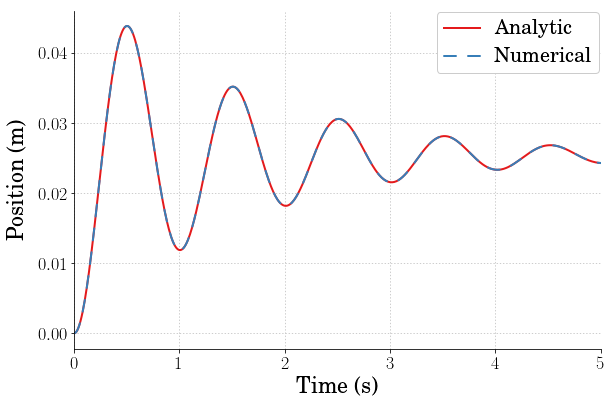

In [12]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_step, step_analytic, linewidth=2, linestyle='-', label=r'Analytic')
plt.plot(t, step_numerical, linewidth=2, linestyle='--', label=r'Numerical')

# uncomment below and set limits if needed
plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('plot_filename.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

We can also direclty compare the two responses by plotting the differenc between the two. We'll plot the `analytic solution - numerical solution`.

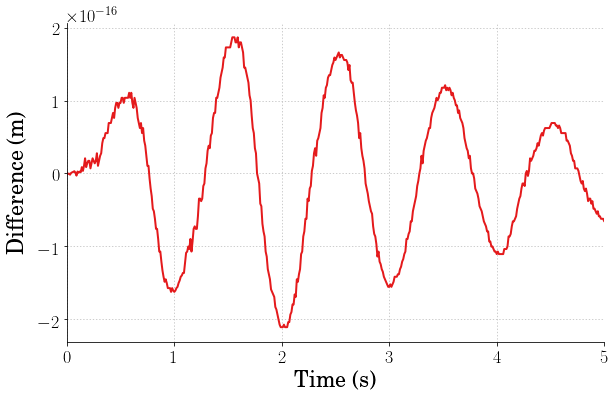

In [13]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Difference (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, step_analytic - step_numerical, linewidth=2, linestyle='-', label=r'Data 1')

# uncomment below and set limits if needed
plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('plot_filename.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

As the plot of responses suggested, there is very little error between the two.

#### Part f.
To numerically evaluate the steady-state position, we can simply simulate the the system over a long time frame, then look at the system value at the end of that time. In our simluation above, despite only plotting the first 5 seconds, we actually ran it for 20 seconds. Now, let's print the entire numerical response.

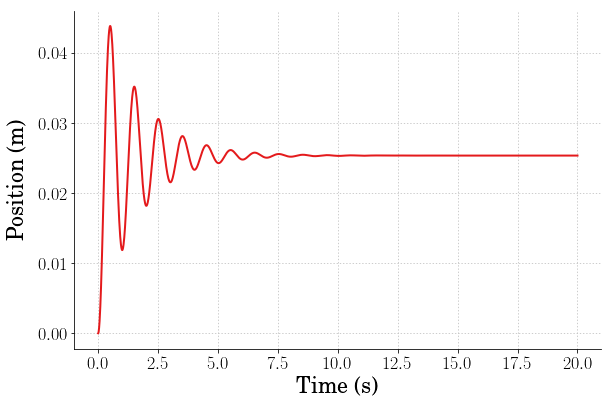

In [14]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, step_numerical, linewidth=2, linestyle='-', label=r'Numerical')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('plot_filename.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

In NumPy, we can access the last element of an array named `array_of_number` using the syntax `array_of_number[-1]`. So, let's look at the last elemnt of the array that stores the numerical step response to approximate the steady-state position.

In [15]:
steady_state_position = step_numerical[-1]
print('The numerical approixmation of steady-state position is {:.4f}.'.format(steady_state_position))

The numerical approixmation of steady-state position is 0.0253.


In the form of the transfer function and input we've used here, analytical solution calculated using the Final Value theorem is:

$ \quad x_{ss} = \frac{1}{\omega_n^2} $

In this case that is:

In [16]:
steady_state_analytical = 1 / wn**2

print('The analtyical steady-state position is {:.4f}.'.format(steady_state_analytical))

The analtyical steady-state position is 0.0253.


As expected, they match.

# Problem 2
The system in Figure 2 connected to ground through a spring of spring constant $k$. It is also connected to input $x_d$ via a damper of damping coefficient $c$. At time $t=0$, a unit-displacement step input is applied to $x_d$.

a. Write the equations of motion for this system.

b. Write the transfer function from the input $x_d$ to the position of the mass $x$. If you were unable to find the equation of motion in part a., assume it is $\ddot{x} + \omega_n^2 x = 2 \zeta\omega_n (\dot{x}_d - \dot{x})$.

c. What is the steady-state value of $x(t)$?

d. What is the steady-state value of the tracking error, $x_d(t) - x(t)$?


**Insert your solutions to Problem 2 here.**

You can insert cells as necssary from the menu above. As a shortcut, you can use alt/option-enter to run a cell and insert an empty cell below it

# Problem 3
The block diagram in Figure 3 represents a position control system where:

$\quad G_p(s) = \frac{1}{s(Js + b)} $

and $K$ is a constant.

a. What is the open-loop transfer function this system?

b. What is the time response, $y(t)$, of the open-loop system to an impulse input (*i.e.* $r(t) = \delta(t)$)?

c. What is the closed-loop transfer function this system?

d. What is the natural frequency of the closed-loop system?

e. What is the damping ratio of the closed-loop system?

f. For a fixed natural frequency, what affects would increasing the damping have on the system response? If possible, provide support for your analysis.

g. For a ramp input, $r(t) = At, \, \forall t\geq0$:

&nbsp; &nbsp; &nbsp; &nbsp;  i. Defining tracking error as $r(t) - y(t)$, what is the steady-state error of the open-loop system to this input?

&nbsp; &nbsp; &nbsp; &nbsp; ii. What is the steady-state error for the closed-loop system to this input?
    
&nbsp; &nbsp; &nbsp; &nbsp; iii. For the closed-loop system, how should $K$ be chosen to limit this error?

**Insert your solutions to Problem 3 here.**
You can insert cells as necssary from the menu above. As a shortcut, you can use alt/option-enter to run a cell and insert an empty cell below it

<hr>


#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [17]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())